In [384]:
# importing the libraries:

# Upload and install models:
from joblib import dump, load

# matrix and mathematics operations:
import numpy as np

# Data handling:
import pandas as pd
from pandas.plotting import scatter_matrix

# Data Visualization:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ML algorithms & tools:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.metrics import root_mean_squared_error, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier

# NN algorithms & tools:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
import tensorflow as tf


# Explore the data:


In [326]:
data = pd.read_csv(r'medicine.csv')
data.head(10)

,Date,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label
0,2025-04-02,Wednesday,14,Emergency,10,33,68,Yes,High
1,2025-02-06,Monday,2,Surgery,10,5,17,Yes,Low
2,2025-01-03,Tuesday,8,Emergency,10,33,61,Yes,High
3,2025-04-08,Saturday,6,Emergency,13,22,38,Yes,High
4,2025-03-13,Thursday,23,Surgery,8,31,52,Yes,High
5,2025-02-06,Sunday,6,Emergency,13,29,57,Yes,High
6,2025-02-01,Saturday,2,Emergency,15,19,31,No,Medium
7,2025-02-27,Sunday,6,Cardiology,14,27,43,Yes,High
8,2025-07-24,Thursday,9,Surgery,9,17,33,No,Medium
9,2025-05-23,Saturday,0,Pediatrics,15,9,25,No,Low


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               10000 non-null  object
 1   Day_of_Week        10000 non-null  object
 2   Hour               10000 non-null  int64 
 3   Department         10000 non-null  object
 4   Staff_Count        10000 non-null  int64 
 5   Num_Patients       10000 non-null  int64 
 6   Average_Wait_Time  10000 non-null  int64 
 7   Emergency_Load     10000 non-null  object
 8   Label              10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [328]:
def split_features(data_ : pd.DataFrame = None, print_ : bool = False) -> tuple:
    """
    :param data_: the data that you want to split it features
    :param print_: to print the name of the numerical and categorical features.
    :return: a tuple of obj_fea_ (categorical features) and num_fea_ (numerical features).
    """

    obj_fea_ = data_.select_dtypes(include= "object").columns.tolist()
    num_fea_ = data_.select_dtypes(include= "number").columns.tolist()

    if print_:
        print(f'the string features in dataset: {obj_fea_}')
        print(f'the string features in dataset: {num_fea_}')

    return obj_fea_, num_fea_

obj_fea, num_fea = split_features(data_= data, print_= True)

the string features in dataset: ['Date', 'Day_of_Week', 'Department', 'Emergency_Load', 'Label']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Average_Wait_Time']


In [329]:
data[num_fea].describe().T.style

,count,mean,std,min,25%,50%,75%,max
Hour,10000.000000,11.422300,6.938687,0.000000,5.000000,11.000000,17.000000,23.000000
Staff_Count,10000.000000,9.043700,3.749479,3.000000,6.000000,9.000000,12.000000,15.000000
Num_Patients,10000.000000,16.728500,9.873051,0.000000,9.000000,16.000000,23.000000,53.000000
Average_Wait_Time,10000.000000,34.588900,15.540787,5.000000,23.000000,33.000000,44.000000,95.000000


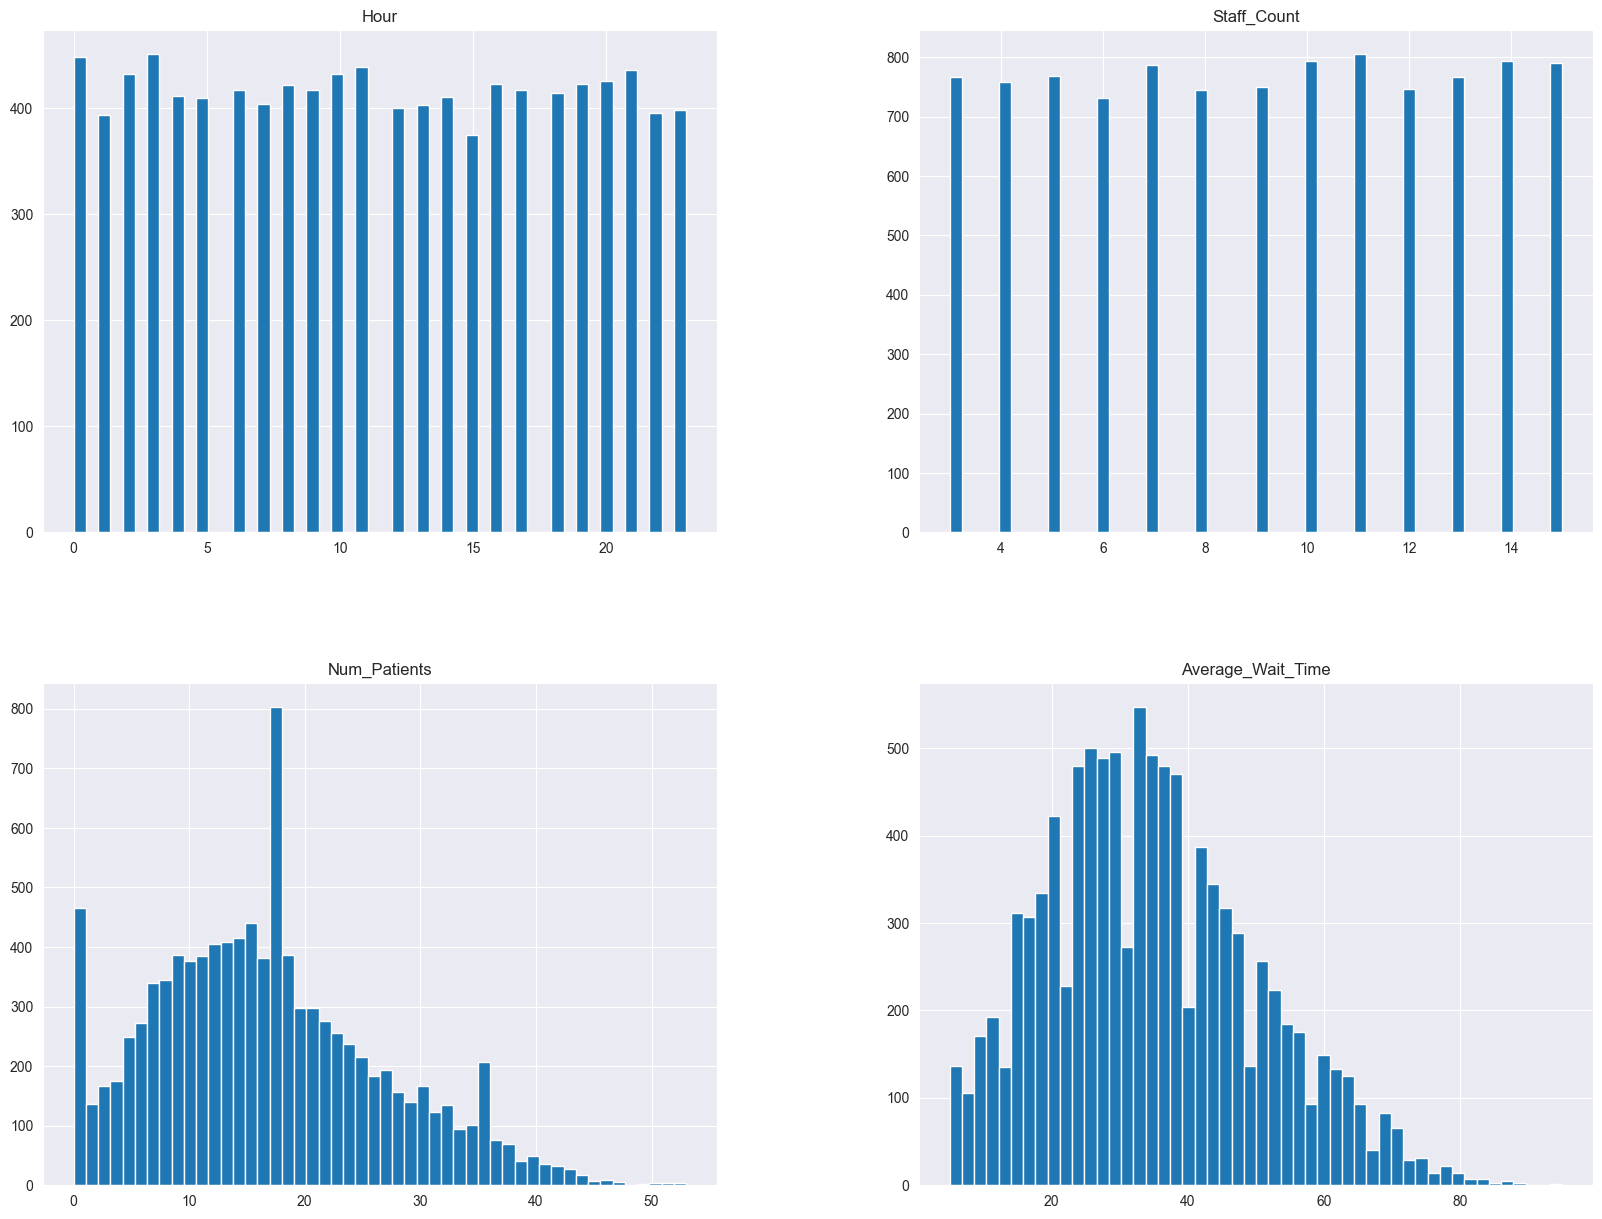

In [330]:
%matplotlib inline
import matplotlib.pyplot as plt
data[num_fea].hist(bins= 50, figsize= (20, 15))
plt.show()

# Visualizing the data :

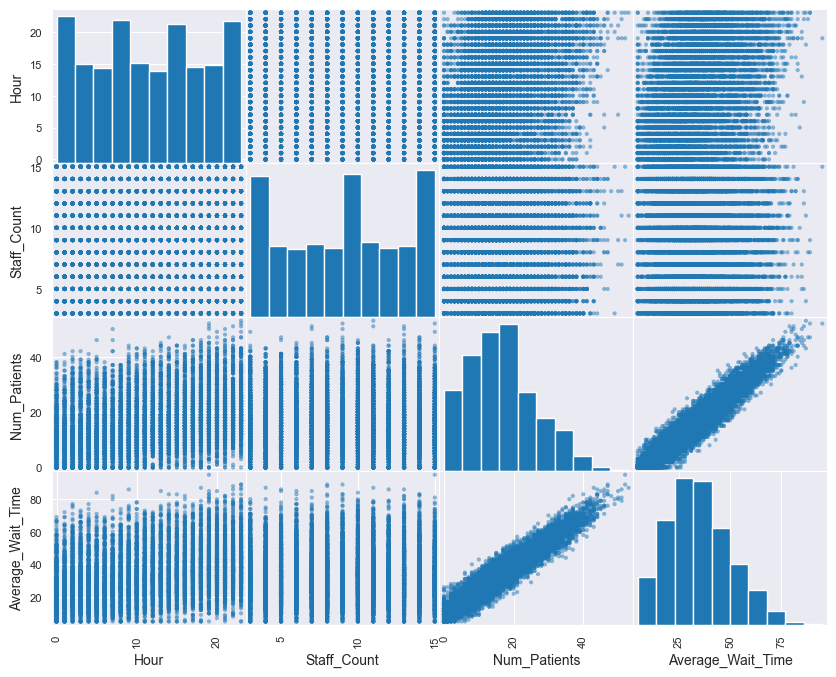

In [331]:
scatter_matrix(data[num_fea], figsize= (10,8))
plt.show()

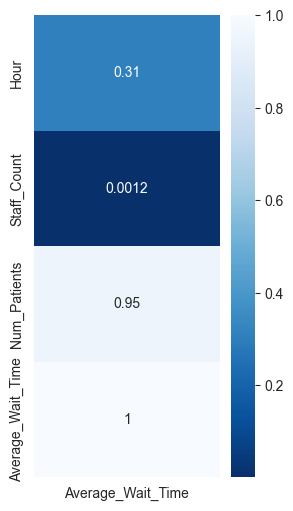

In [332]:
corr_mx = data[num_fea].corr()
corr_vr = corr_mx[["Average_Wait_Time"]]

plt.figure(figsize=(3, 6))
sns.heatmap(corr_vr, annot= True, cmap= "Blues_r")
plt.show()

# Feature Extraction:
* Data -> convert to year, month, day, delete the year if it useless.

In [333]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(labels= 'Date', axis= 1, inplace= True)
data.head()

,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label,Year,Month,Day
0,Wednesday,14,Emergency,10,33,68,Yes,High,2025,4,2
1,Monday,2,Surgery,10,5,17,Yes,Low,2025,2,6
2,Tuesday,8,Emergency,10,33,61,Yes,High,2025,1,3
3,Saturday,6,Emergency,13,22,38,Yes,High,2025,4,8
4,Thursday,23,Surgery,8,31,52,Yes,High,2025,3,13


In [334]:
obj_fea, num_fea = split_features(data_= data, print_= True)

the string features in dataset: ['Day_of_Week', 'Department', 'Emergency_Load', 'Label']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Average_Wait_Time', 'Year', 'Month', 'Day']


C:\Users\MSI\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\MSI\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\MSI\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


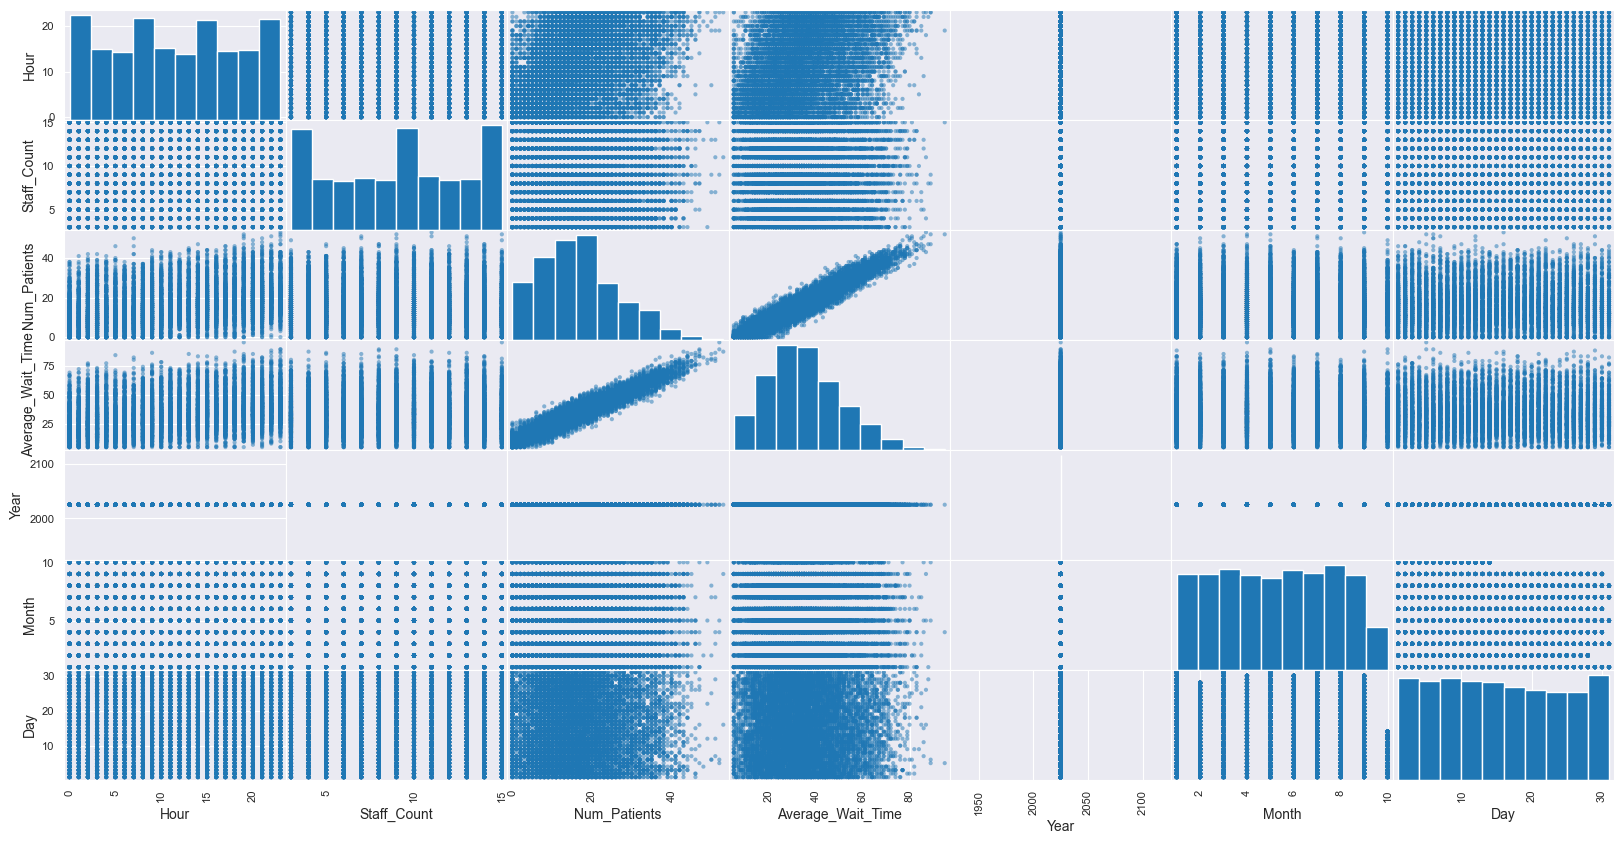

In [335]:
scatter_matrix(data[num_fea], figsize= (20,10))
plt.show()

<Axes: >

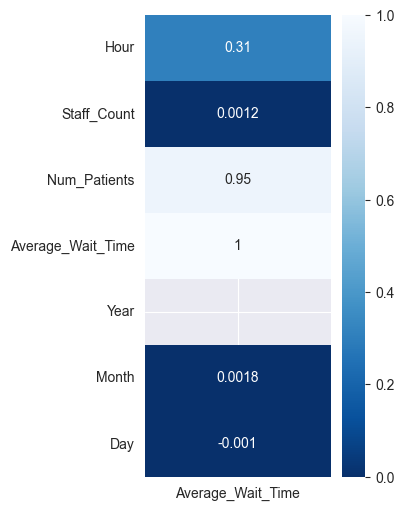

In [336]:
corr_mx = data[num_fea].corr()
corr_vr = corr_mx[["Average_Wait_Time"]]

plt.figure(figsize=(3, 6))
sns.heatmap(corr_vr, annot= True, cmap= "Blues_r")

In [337]:
data.drop(labels= 'Year', axis= 1, inplace= True)

obj_fea, num_fea = split_features(data_= data, print_= True)

the string features in dataset: ['Day_of_Week', 'Department', 'Emergency_Load', 'Label']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Average_Wait_Time', 'Month', 'Day']


<Axes: >

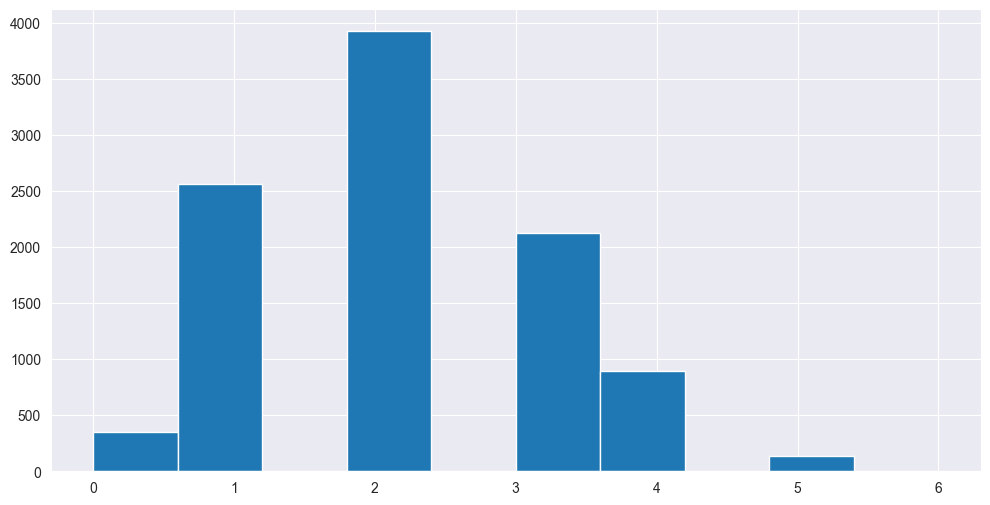

In [338]:
bins = [
    data["Num_Patients"].min,
    data["Num_Patients"].quantile(0.25),
    data["Num_Patients"].median,
    data["Num_Patients"].quantile(0.5),
    data["Num_Patients"].max
]

data["Num_Patients_cat"] = pd.cut(x= data["Num_Patients"],
                               bins= [-10, 0, 10, 20, 30, 40, 50, 60],
                               labels= [0, 1, 2, 3, 4, 5, 6])

data["Num_Patients_cat"].hist(figsize= (12, 6))


In [339]:
split = StratifiedShuffleSplit(n_splits= 1,
                               test_size= 0.2,
                               random_state= 42,
                               )

strat_train_set = pd.DataFrame()
strat_test_set = pd.DataFrame()

for train_index, test_index in split.split(data, data["Num_Patients_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

display(strat_train_set.head(), strat_test_set.head())

,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label,Month,Day,Num_Patients_cat
5876,Friday,22,Pediatrics,8,12,31,Yes,Medium,6,15,2
5600,Thursday,7,Surgery,13,19,38,No,Medium,9,29,2
2201,Friday,3,Surgery,11,15,37,Yes,Medium,1,12,2
4558,Sunday,8,Cardiology,10,15,28,No,Medium,6,23,2
3097,Sunday,5,Cardiology,13,9,26,No,Low,7,26,1


,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label,Month,Day,Num_Patients_cat
434,Monday,3,Pediatrics,8,10,18,Yes,Medium,6,29,1
6526,Monday,13,Pediatrics,9,22,34,No,High,8,13,3
7878,Monday,5,Surgery,4,6,15,Yes,Low,7,10,1
2189,Sunday,16,Pediatrics,9,22,36,Yes,High,1,7,3
84,Tuesday,11,Radiology,3,22,43,No,High,6,15,3


In [340]:
train_set, test_set = train_test_split(data,
                                       test_size= 0.2,
                                       random_state= 42,
                                       )

statum_table = pd.DataFrame(data= {
    "Overall" : data["Num_Patients_cat"].value_counts() / len(data["Num_Patients_cat"]),
    "Random" : test_set["Num_Patients_cat"].value_counts() / len(test_set["Num_Patients_cat"]),
    "Stratified" : strat_test_set["Num_Patients_cat"].value_counts() / len(strat_test_set),
    "Random. %error": data["Num_Patients_cat"].value_counts() / len(data["Num_Patients_cat"]) - test_set["Num_Patients_cat"].value_counts() / len(test_set["Num_Patients_cat"]),
    "Strat. %error": data["Num_Patients_cat"].value_counts() / len(data["Num_Patients_cat"])  -  strat_test_set["Num_Patients_cat"].value_counts() / len(strat_test_set["Num_Patients_cat"]),
})
del train_set, test_set

statum_table.sort_values(by= "Num_Patients_cat")

,Overall,Random,Stratified,Random. %error,Strat. %error
Num_Patients_cat,,,,,
0,0.0350,0.0290,0.0350,0.0060,0.0000
1,0.2561,0.2615,0.2560,-0.0054,0.0001
2,0.3923,0.3900,0.3925,0.0023,-0.0002
3,0.2123,0.2050,0.2125,0.0073,-0.0002
4,0.0897,0.0945,0.0895,-0.0048,0.0002
5,0.0140,0.0185,0.0140,-0.0045,0.0000
6,0.0006,0.0015,0.0005,-0.0009,0.0001


# prepare the pipelines

In [341]:
X_train = strat_train_set.drop(labels= ['Average_Wait_Time', 'Label'], axis= 1)
y_train_reg = strat_train_set.Average_Wait_Time
y_train_clf = strat_train_set.Label

X_test = strat_test_set.drop(labels= ['Average_Wait_Time', 'Label'], axis= 1)
y_test_reg = strat_test_set.Average_Wait_Time
y_test_clf = strat_test_set['Label']

obj_fea, num_fea = split_features(data_= X_train, print_= True)

the string features in dataset: ['Day_of_Week', 'Department', 'Emergency_Load']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Month', 'Day']


In [342]:
print(f'The shape of the training feature {X_train.shape}, regression label shape: {y_train_reg.shape}, classification label shape: {y_train_clf.shape}')
print(f'The shape of the testing feature {X_test.shape}, regression label shape: {y_test_reg.shape}, classification label shape: {y_test_clf.shape}')

The shape of the training feature (8000, 9), regression label shape: (8000,), classification label shape: (8000,)
The shape of the testing feature (2000, 9), regression label shape: (2000,), classification label shape: (2000,)


In [343]:
imputer = SimpleImputer(strategy= "median")

imputer_data = imputer.fit_transform(X_train[num_fea])

X_train_set_tr = pd.DataFrame(data= imputer_data, columns= num_fea)

print(imputer.statistics_)
X_train_set_tr.head()

[11.  9. 16.  5. 15.]


,Hour,Staff_Count,Num_Patients,Month,Day
0,22.0,8.0,12.0,6.0,15.0
1,7.0,13.0,19.0,9.0,29.0
2,3.0,11.0,15.0,1.0,12.0
3,8.0,10.0,15.0,6.0,23.0
4,5.0,13.0,9.0,7.0,26.0


In [344]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X= X_train[num_fea])

X_train_scale = pd.DataFrame(
    data= X_train_scale,
    columns= num_fea
)
X_train_scale.head()

,Hour,Staff_Count,Num_Patients,Month,Day
0,1.524405,-0.283183,-0.476582,0.273075,-0.028351
1,-0.639509,1.055585,0.231808,1.373629,1.559294
2,-1.216552,0.520078,-0.172986,-1.561182,-0.368560
3,-0.495248,0.252324,-0.172986,0.273075,0.878875
4,-0.928031,1.055585,-0.780178,0.639926,1.219085


In [345]:
one_hot_encoder = OneHotEncoder()

X_train_set_en = one_hot_encoder.fit_transform(X_train[obj_fea])

print(X_train_set_en[10])
print(one_hot_encoder.categories_)

  (0, 1)	1.0
  (0, 7)	1.0
  (0, 13)	1.0
[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object), array(['Cardiology', 'Emergency', 'Pediatrics', 'Radiology', 'Surgery'],
      dtype=object), array(['No', 'Yes'], dtype=object)]


In [346]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy= "median")),
    ('scaler', StandardScaler())
])

final_pipeline_reg\
    = ColumnTransformer(
    transformers= [
        ('num_pipeline', num_pipeline, num_fea),
        ('cat_pipeline', OneHotEncoder(), obj_fea)
    ]
)
X_train_prepared = final_pipeline_reg.fit_transform(X= X_train)
X_train_prepared = pd.DataFrame(data= X_train_prepared)
X_train_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.524405,-0.283183,-0.476582,0.273075,-0.028351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.639509,1.055585,0.231808,1.373629,1.559294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.216552,0.520078,-0.172986,-1.561182,-0.368560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.495248,0.252324,-0.172986,0.273075,0.878875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.928031,1.055585,-0.780178,0.639926,1.219085,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Regression

## Training Step

In [347]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_prepared, y_train_reg)

y_pred_reg = linear_reg.predict(X_train_prepared)

rmse = root_mean_squared_error(y_true= y_train_reg, y_pred= y_pred_reg)

print(f'the root mean squared error: {rmse}')

the root mean squared error: 4.9815664071999235


In [348]:
forest_reg = RandomForestRegressor(random_state= 42)

forest_reg.fit(X_train_prepared, y_train_reg)

y_pred_forest = forest_reg.predict(X_train_prepared)

rmse = root_mean_squared_error(y_true= y_train_reg, y_pred= y_pred_forest)

print(f'the root mean squared error: {rmse}')

the root mean squared error: 1.9717488303533999


## Cross validation step:

In [349]:
def display_scores(score):
    print(f"the Scores: {score}")
    print(f"the Scores mean: {score.mean()}")
    print(f"the Scores std: {score.std()}")

In [350]:
linear_reg_score = cross_val_score(estimator= linear_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= -linear_reg_score)

the Scores: [24.61465256 24.16591428 26.43972095 24.52200196]
the Scores mean: 24.93557243730072
the Scores std: 0.884430119592185


In [351]:
forest_reg_score = cross_val_score(estimator= forest_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= forest_reg_score)

the Scores: [-27.58854095 -26.5560733  -29.41343955 -27.4427276 ]
the Scores mean: -27.750195350000002
the Scores std: 1.0383854416182916


In [352]:
xgboost_reg = XGBRegressor()

xgboost_reg_score = cross_val_score(estimator= xgboost_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= -
xgboost_reg_score)

the Scores: [30.31125069 28.42498779 31.23594475 30.62918282]
the Scores mean: 30.150341510772705
the Scores std: 1.0500667357479736


In [353]:
ridge_reg = Ridge(random_state= 42, alpha= 1e-1)

ridge_reg_score = cross_val_score(estimator= ridge_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= -ridge_reg_score)

the Scores: [24.61467947 24.16590032 26.43958648 24.52206109]
the Scores mean: 24.93555683796746
the Scores std: 0.8843666311378201


In [354]:
nn_reg = Sequential(
    layers= [
        Input(shape= (19,), name= 'input_layer'),
        Dense(units= 32, activation= 'tanh', name= 'layer_1'),
        Dense(units= 12, activation= 'linear', name= 'layer_2'),
        Dense(units= 1, activation= 'linear', name= 'layer_3'),
    ]
)

In [355]:
nn_reg.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 32)                640       
                                                                 
 layer_2 (Dense)             (None, 12)                396       
                                                                 
 layer_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1049 (4.10 KB)
Trainable params: 1049 (4.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [356]:
nn_reg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
    loss= tf.keras.losses.mean_squared_error
)

In [357]:
nn_reg.fit(X_train_prepared, y_train_reg, epochs= 30)

Epoch 1/30
250/250 [==============================] - 0s 630us/step - loss: 684.5447
Epoch 2/30
250/250 [==============================] - 0s 575us/step - loss: 42.7777
Epoch 3/30
250/250 [==============================] - 0s 596us/step - loss: 33.0798
Epoch 4/30
250/250 [==============================] - 0s 582us/step - loss: 30.6910
Epoch 5/30
250/250 [==============================] - 0s 660us/step - loss: 28.9301
Epoch 6/30
250/250 [==============================] - 0s 681us/step - loss: 27.7348
Epoch 7/30
250/250 [==============================] - 0s 663us/step - loss: 26.8955
Epoch 8/30
250/250 [==============================] - 0s 591us/step - loss: 26.4181
Epoch 9/30
250/250 [==============================] - 0s 584us/step - loss: 26.0448
Epoch 10/30
250/250 [==============================] - 0s 593us/step - loss: 25.8333
Epoch 11/30
250/250 [==============================] - 0s 621us/step - loss: 25.5088
Epoch 12/30
250/250 [==============================] - 0s 587us/step - lo

## Testing step:

In [358]:
X_test_prepared = final_pipeline_reg.transform(X_test)

linear_test_score_reg = cross_val_score(estimator= linear_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')
forest_test_score_reg = cross_val_score(estimator= forest_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')
xgboost_test_score_reg = cross_val_score(estimator= xgboost_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')
ridge_test_score_reg = cross_val_score(estimator= ridge_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')


display_scores(-linear_test_score_reg)
print('=' * 10)
display_scores(-forest_test_score_reg)
print('=' * 10)
display_scores(-xgboost_test_score_reg)
print('=' * 10)
display_scores(-ridge_test_score_reg)
print('=' * 10)


the Scores: [25.56412474 24.01904546 28.46804823]
the Scores mean: 26.0170728113891
the Scores std: 1.844320631558501
the Scores: [29.27222339 26.50918426 31.61291817]
the Scores mean: 29.131441938115028
the Scores std: 2.0859673246589967
the Scores: [36.16619873 31.14351845 37.38048553]
the Scores mean: 34.8967342376709
the Scores std: 2.6998264986584513
the Scores: [25.56270844 24.01795059 28.46935042]
the Scores mean: 26.016669818880427
the Scores std: 1.8454088623420648


# classification training:

In [359]:
X_train_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.524405,-0.283183,-0.476582,0.273075,-0.028351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.639509,1.055585,0.231808,1.373629,1.559294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.216552,0.520078,-0.172986,-1.561182,-0.368560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.495248,0.252324,-0.172986,0.273075,0.878875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.928031,1.055585,-0.780178,0.639926,1.219085,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [360]:
ordinal_encoder = OrdinalEncoder()

y_train_clf_en = ordinal_encoder.fit_transform([y_train_clf])

y_train_clf_en = pd.Series(y_train_clf_en[0])

y_train_clf_en.unique()

array([0.])

In [361]:
def divide_test_set(x):
    if x == 'High':
        return 2
    elif x == 'Medium':
        return 1
    else:
        return 0

y_train_clf_en1 = y_train_clf.apply(lambda x : divide_test_set(x))
y_train_clf_en1.unique()

array([1, 0, 2], dtype=int64)

In [362]:
y_train_clf = y_train_clf_en1

y_train_clf.head()

5876    1
5600    1
2201    1
4558    1
3097    0
Name: Label, dtype: int64

## Training step:

In [371]:
def clf_scores(y_true, y_pred, model, average):

    print(f'the precision score of {model}: {precision_score(y_true= y_true, y_pred= y_pred, average= average)}')
    print(f'the recall score of {model}: {recall_score(y_true= y_true, y_pred= y_pred, average= average)}')
    print(f'the f1 score of {model}: {f1_score(y_true= y_true, y_pred= y_pred, average= average)}')


In [372]:
linear_clf = LogisticRegression()

linear_clf.fit(X= X_train_prepared, y= y_train_clf)

y_linear_predict_clf = linear_clf.predict(X= X_train_prepared)

clf_scores(y_true= y_train_clf, y_pred= y_linear_predict_clf, model= "logistic Regression", average= 'macro')

the precision score of logistic Regression: 1.0
the recall score of logistic Regression: 1.0
the f1 score of logistic Regression: 1.0


## Cross-validation:

In [374]:
y_linear_score_clf = cross_val_predict(estimator= linear_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_linear_score_clf, model= 'Logistic Regression', average= 'macro')

the precision score of Logistic Regression: 0.9998958983968352
the recall score of Logistic Regression: 0.9998795761078997
the f1 score of Logistic Regression: 0.9998877182448401


In [376]:
forest_clf = RandomForestClassifier(random_state= 42)

y_forest_score_clf = cross_val_predict(estimator= forest_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_forest_score_clf, model= 'Random Forest Classifier', average= 'macro')

the precision score of Random Forest Classifier: 0.9998958983968352
the recall score of Random Forest Classifier: 0.9998358772361726
the f1 score of Random Forest Classifier: 0.9998658594801908


In [377]:
xgboost_clf = XGBClassifier()

y_xgboost_score_clf = cross_val_predict(estimator= xgboost_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_xgboost_score_clf, model= 'XGBoost', average= 'macro')

the precision score of XGBoost: 1.0
the recall score of XGBoost: 1.0
the f1 score of XGBoost: 1.0


In [378]:
ridge_clf = RidgeClassifier(random_state= 42)

y_ridge_score_clf = cross_val_predict(estimator= ridge_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_ridge_score_clf, model= 'Logistic Regression', average= 'macro')

the precision score of Logistic Regression: 0.8756403410306782
the recall score of Logistic Regression: 0.8610472031387087
the f1 score of Logistic Regression: 0.8629061808289235


## Testing step:

In [379]:
y_test_clf_en1 = y_test_clf.apply(lambda x : divide_test_set(x))
print(y_test_clf_en1.value_counts())
print('=' * 100)
print(y_test_clf.value_counts())

Label
1    800
2    696
0    504
Name: count, dtype: int64
Label
Medium    800
High      696
Low       504
Name: count, dtype: int64


In [380]:
y_test_clf = y_test_clf_en1
y_test_clf.head()

434     1
6526    2
7878    0
2189    2
84      2
Name: Label, dtype: int64

In [382]:
y_linear_score_clf_test = cross_val_predict(estimator= linear_clf, X= X_test_prepared, y= y_test_clf, cv= 3)

clf_scores(y_true= y_test_clf, y_pred= y_linear_score_clf_test, model= 'Logistic Regression', average= 'macro')

the precision score of Logistic Regression: 0.9871537914275436
the recall score of Logistic Regression: 0.9853899835796388
the f1 score of Logistic Regression: 0.9861988471716114


In [383]:
y_xgboost_score_clf_test = cross_val_predict(estimator= xgboost_clf, X= X_test_prepared, y= y_test_clf, cv= 3)

clf_scores(y_true= y_test_clf, y_pred= y_xgboost_score_clf_test, model= 'XGBoost Classifier', average= 'macro')

the precision score of XGBoost Classifier: 1.0
the recall score of XGBoost Classifier: 1.0
the f1 score of XGBoost Classifier: 1.0


# Models uploading:

In [385]:
reg_model = linear_reg
clf_model = linear_clf

import os
os.makedirs('', exist_ok=True)

# Save the model
dump(reg_model, 'regression_model.joblib')
dump(clf_model, 'classification_model.joblib')


['models/classification_model.joblib']